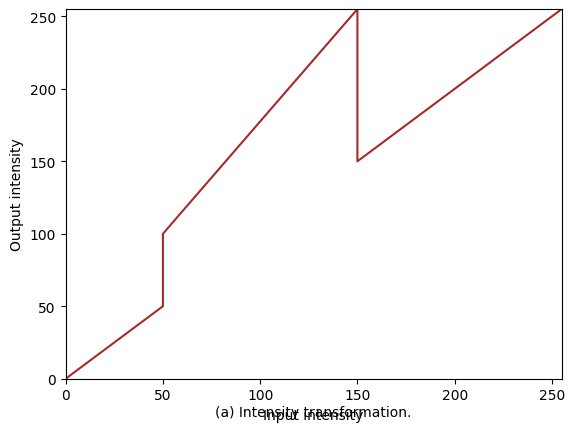

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the control points for the transformation
control_points = np.array([(0, 0), (50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Extract x and y coordinates from the control points
x = control_points[:, 0]
y = control_points[:, 1]

# Plot the transformation curve
fig, ax = plt.subplots()
ax.plot(x, y, color='brown')  # Brown color as shown in the image

# Set axis labels
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')

# Set axis limits
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)

# Add title or caption (optional)
ax.text(0.5, -0.1, "(a) Intensity transformation.", ha='center', transform=ax.transAxes)

# Show the plot
plt.show()


Transform length: 256


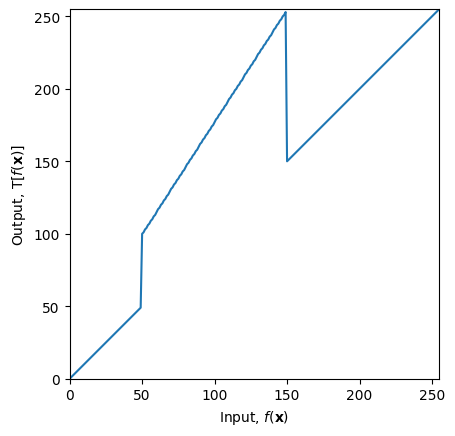

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Define the intensity ranges based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      # From 0 to 50
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # From 50 to 100
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  # From 100 to 150
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  # From 150 to 200
t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  # From 200 to 255

# Concatenate the transformation arrays
transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
print(f'Transform length: {len(transform)}')

# Plot the transformation curve
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')  # Use raw string literals for LaTeX-style math
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')  # Correct the backslashes
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.show()

# Load the original image
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

cv.imshow("Original Image", img_orig)
cv.waitKey(0)

# Apply intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Show transformed image
cv.imshow("Transformed Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Transform length: 256


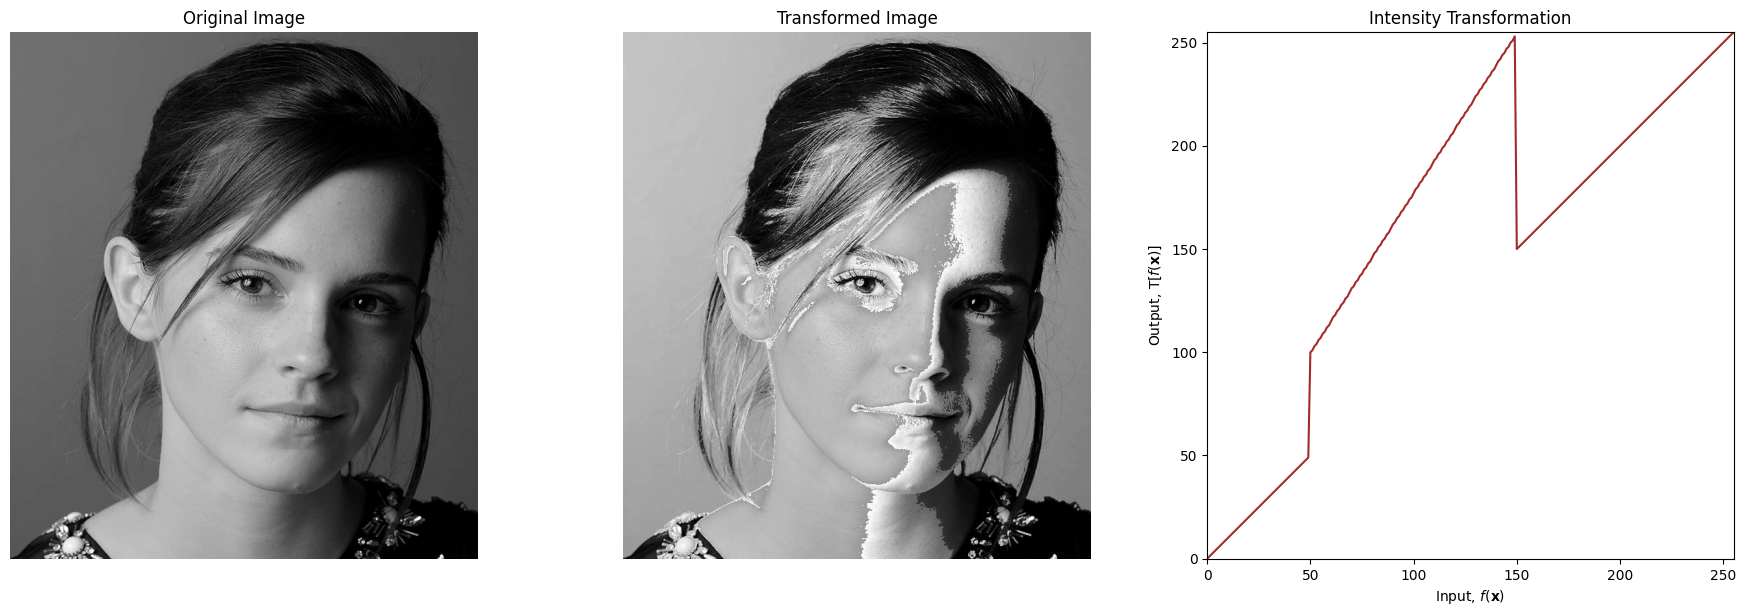

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Define the intensity ranges based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      # From 0 to 50
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  # From 50 to 100
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  # From 100 to 150
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  # From 150 to 200
t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  # From 200 to 255

# Concatenate the transformation arrays
transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
print(f'Transform length: {len(transform)}')

# Load the original image
img_orig = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply intensity windowing transformation
image_transformed = cv.LUT(img_orig, transform)

# Display using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the original image
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')  # Turn off axis labels

# Plot the transformed image
ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')  # Turn off axis labels

# Plot the transformation curve
ax[2].plot(transform, color='brown')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')  # Use raw string literals for LaTeX-style math
ax[2].set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')  # Correct the backslashes
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')
ax[2].set_title('Intensity Transformation')

# Adjust layout and display
plt.tight_layout()
plt.show()


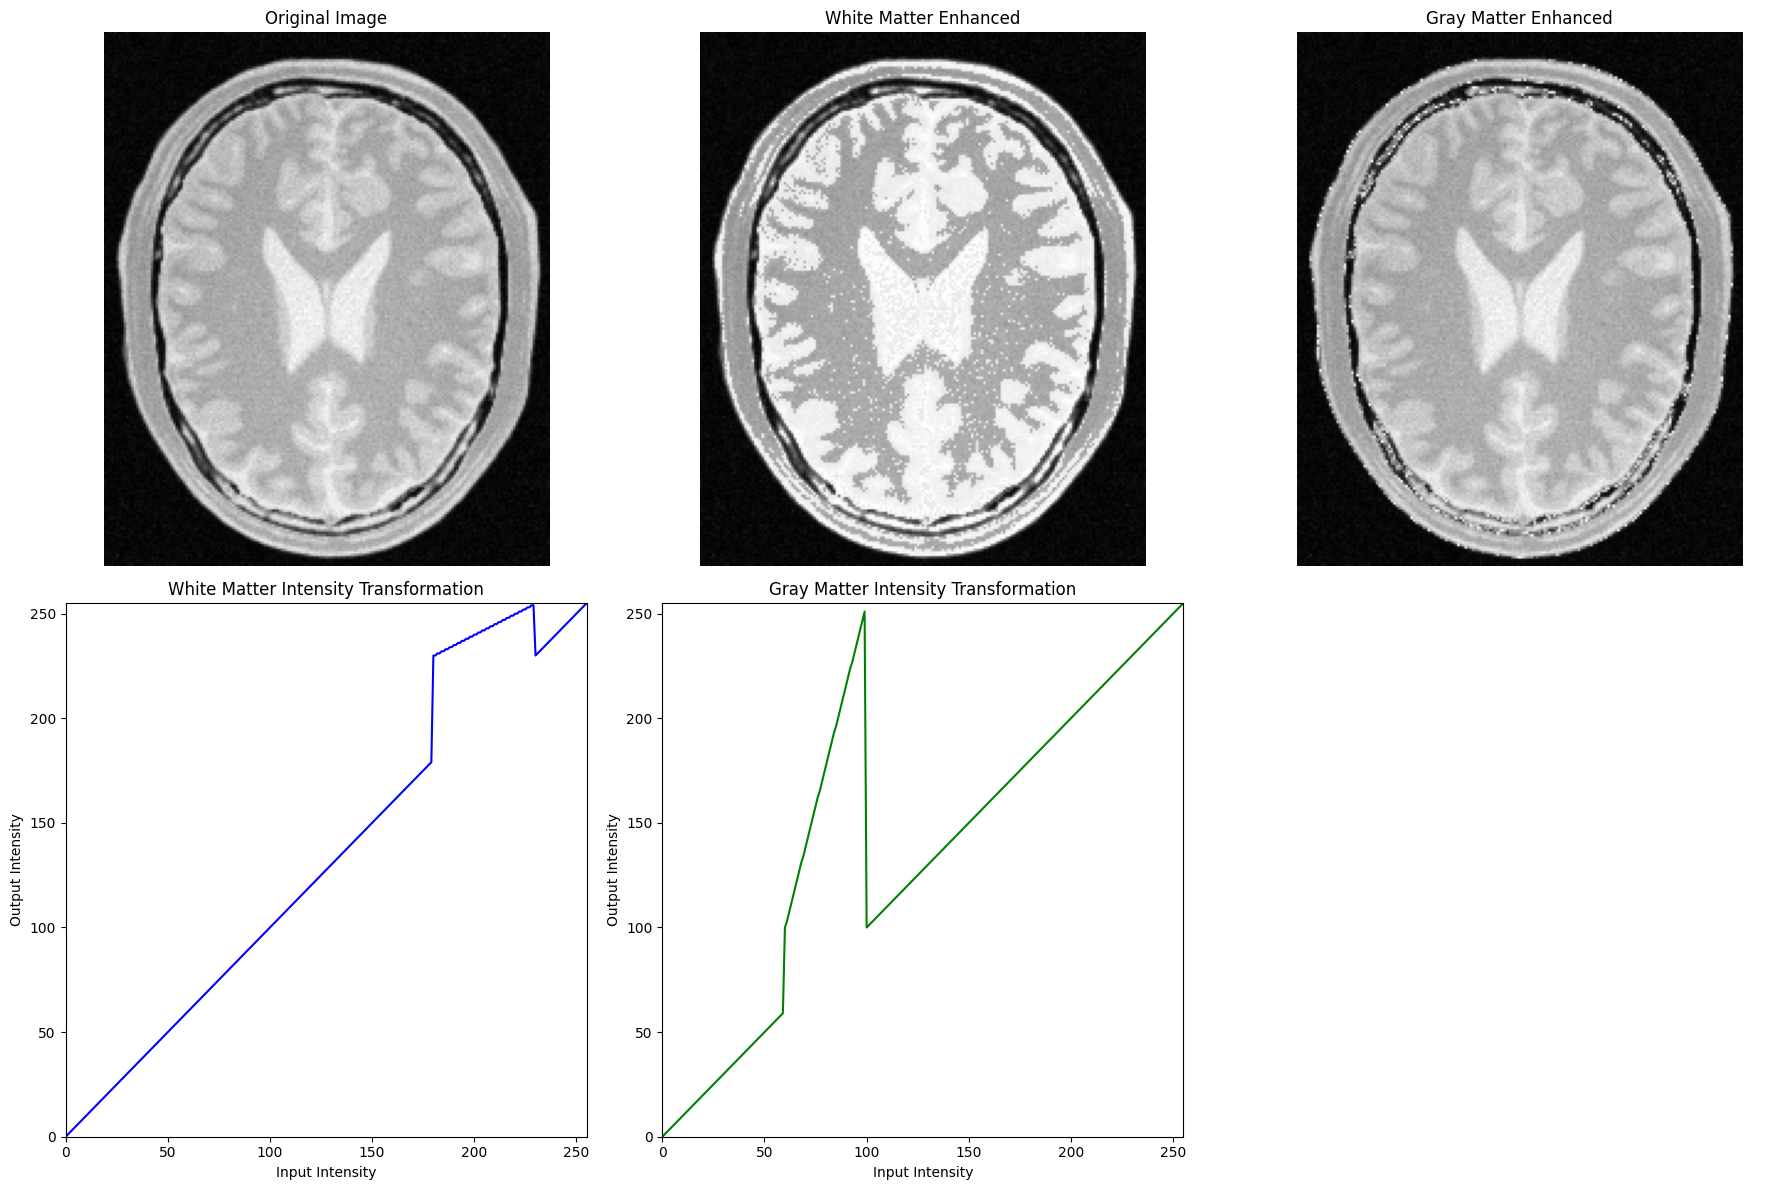

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain image
brain_img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define control points for white matter transformation
c_white_matter = np.array([(180, 180), (180, 230), (230, 255), (230, 230), (255, 255)])

# Define control points for gray matter transformation
c_gray_matter = np.array([(60, 60), (60, 100), (100, 255), (100, 100), (255, 255)])

# Function to create intensity transformation based on control points
def create_intensity_transform(c):
    t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')      
    t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0] + 1).astype('uint8')  
    t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0] + 1).astype('uint8')  
    t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0] + 1).astype('uint8')  
    t5 = np.linspace(c[3, 1], c[4, 1], c[4, 0] - c[3, 0] + 1).astype('uint8')  
    
    # Concatenate the transformation arrays
    transform = np.concatenate((t1[:-1], t2[:-1], t3[:-1], t4[:-1], t5), axis=0)
    return transform

# Create intensity transformations
transform_white = create_intensity_transform(c_white_matter)
transform_gray = create_intensity_transform(c_gray_matter)

# Apply intensity windowing transformations
image_white_matter = cv.LUT(brain_img, transform_white)
image_gray_matter = cv.LUT(brain_img, transform_gray)

# Plot the original image, white matter enhanced, and gray matter enhanced images
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Original image
ax[0, 0].imshow(brain_img, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# White matter enhanced image
ax[0, 1].imshow(image_white_matter, cmap='gray')
ax[0, 1].set_title('White Matter Enhanced')
ax[0, 1].axis('off')

# Gray matter enhanced image
ax[0, 2].imshow(image_gray_matter, cmap='gray')
ax[0, 2].set_title('Gray Matter Enhanced')
ax[0, 2].axis('off')

# Plot intensity transformation for white matter
ax[1, 0].plot(transform_white, color='blue')
ax[1, 0].set_title('White Matter Intensity Transformation')
ax[1, 0].set_xlim(0, 255)
ax[1, 0].set_ylim(0, 255)
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')

# Plot intensity transformation for gray matter
ax[1, 1].plot(transform_gray, color='green')
ax[1, 1].set_title('Gray Matter Intensity Transformation')
ax[1, 1].set_xlim(0, 255)
ax[1, 1].set_ylim(0, 255)
ax[1, 1].set_xlabel('Input Intensity')
ax[1, 1].set_ylabel('Output Intensity')

# Hide the last plot
ax[1, 2].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()